In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "/root/data/"

df_fake = pd.read_csv(data_path + "Fake.csv")
df_true = pd.read_csv(data_path + "True.csv")
df_fake['label'] = 1  # Fake news label
df_true['label'] = 0   # Real news label
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [9]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [10]:
df = pd.concat([df_true,df_fake])
df = df.drop(['title','subject','date'],axis=1)
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def load_glove_vectors(glove_file_path):
    word_vectors = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            word_vectors[word] = vector
    return word_vectors

def preprocess_text(text):
    text = text.lower()                              # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)          # Remove special characters and numbers
    tokens = word_tokenize(text)                     # Tokenization
    stop_words = set(stopwords.words('english'))     # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # lemmatizer = WordNetLemmatizer()                 # Lemmatization  ex: running => run (not nesscessary, but i want to test)
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

glove_path = "/root/data/glove/"
word_vectors = load_glove_vectors(glove_path + "glove.6B.100d.txt")


df['clean_text'] = df['text'].apply(preprocess_text)
df.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label,clean_text
0,WASHINGTON (Reuters) - The head of a conservat...,0,"[washington, reuters, head, conservative, repu..."
1,WASHINGTON (Reuters) - Transgender people will...,0,"[washington, reuters, transgender, people, all..."
2,WASHINGTON (Reuters) - The special counsel inv...,0,"[washington, reuters, special, counsel, invest..."
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0,"[washington, reuters, trump, campaign, adviser..."
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,"[seattlewashington, reuters, president, donald..."


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def tokens_to_vectors(tokens):
    vectors = []
    for token in tokens:
        if token in word_vectors:
            vectors.append(word_vectors[token])
    if not vectors: # return none if no valid word vectors found 
        return None
    return np.mean(vectors, axis=0)

df['doc_vector'] = df['clean_text'].apply(tokens_to_vectors)
df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(df['doc_vector'].tolist(), df['label'], test_size=0.2, random_state=42)
df.head()

,text,label,clean_text,doc_vector
0,WASHINGTON (Reuters) - The head of a conservat...,0,"[washington, reuters, head, conservative, repu...","[-0.077617005, 0.18136153, 0.26305065, -0.2329..."
1,WASHINGTON (Reuters) - Transgender people will...,0,"[washington, reuters, transgender, people, all...","[0.06912143, -0.054227337, 0.12197351, -0.0733..."
2,WASHINGTON (Reuters) - The special counsel inv...,0,"[washington, reuters, special, counsel, invest...","[-0.096503265, -0.047262732, 0.27596813, -0.22..."
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0,"[washington, reuters, trump, campaign, adviser...","[-0.092887245, -0.15168507, 0.23935626, -0.110..."
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,"[seattlewashington, reuters, president, donald...","[-0.018570144, 0.09180134, 0.21725424, -0.1467..."


In [13]:
print(df['doc_vector'][0].to_list())

[array([-0.077617  ,  0.18136153,  0.26305065, -0.23296304,  0.13417992,
       -0.10997217, -0.26759976,  0.08891775, -0.04428137, -0.00249818,
       -0.0246676 , -0.05060842, -0.04418219, -0.07292591, -0.05181812,
       -0.2623384 ,  0.10799746,  0.07042778, -0.3686943 ,  0.04454444,
        0.19263002, -0.00511991,  0.08577151, -0.00627958, -0.24894513,
       -0.17845991, -0.18504605, -0.3723434 , -0.1552869 , -0.14986892,
        0.20181009,  0.40377313, -0.03158143, -0.01449121, -0.09444003,
        0.251681  , -0.01294147, -0.00443321, -0.09014698,  0.1217403 ,
       -0.43103194, -0.38282764,  0.20436859,  0.00753224, -0.15110278,
       -0.2562862 ,  0.02853767, -0.28838778, -0.16440338, -0.5995348 ,
        0.07711659, -0.19094424,  0.07214498,  0.7335864 , -0.04020729,
       -1.7825102 ,  0.2175383 , -0.30491725,  1.3524702 ,  0.39681745,
       -0.09299772,  0.18816169, -0.0870368 , -0.08841023,  0.5517362 ,
        0.03153479,  0.09992132,  0.39916977,  0.30359983, -0.1

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=10)  
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('----------------')
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('----------------')
print('Classification report')
print(classification_report(y_pred,y_test))


Accuracy: 0.9215708465368945
----------------
Confusion matrix
[[4135  531]
 [ 162 4008]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4666
           1       0.88      0.96      0.92      4170

    accuracy                           0.92      8836
   macro avg       0.92      0.92      0.92      8836
weighted avg       0.92      0.92      0.92      8836



In [15]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

height = 100
width = 1
channels = 1

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)


print(X_train.shape)



model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2024-05-26 15:30:52.005311: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-26 15:30:52.022873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(35343, 100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,921 (1.53 MB)

 Trainable params: 401,921 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8745 - loss: 0.3119 - val_accuracy: 0.9225 - val_loss: 0.1983
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.1854 - val_accuracy: 0.9347 - val_loss: 0.1733
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9331 - loss: 0.1760 - val_accuracy: 0.9364 - val_loss: 0.1652
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9393 - loss: 0.1556 - val_accuracy: 0.9426 - val_loss: 0.1514
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.1570 - val_accuracy: 0.9460 - val_loss: 0.1449
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9426 - loss: 0.1501 - val_accuracy: 0.9502 - val_loss: 0.1439
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9402 - loss: 0.1547 - val_accuracy: 0.9465 - val_loss: 0.1387
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1465 - val_accuracy: 0.

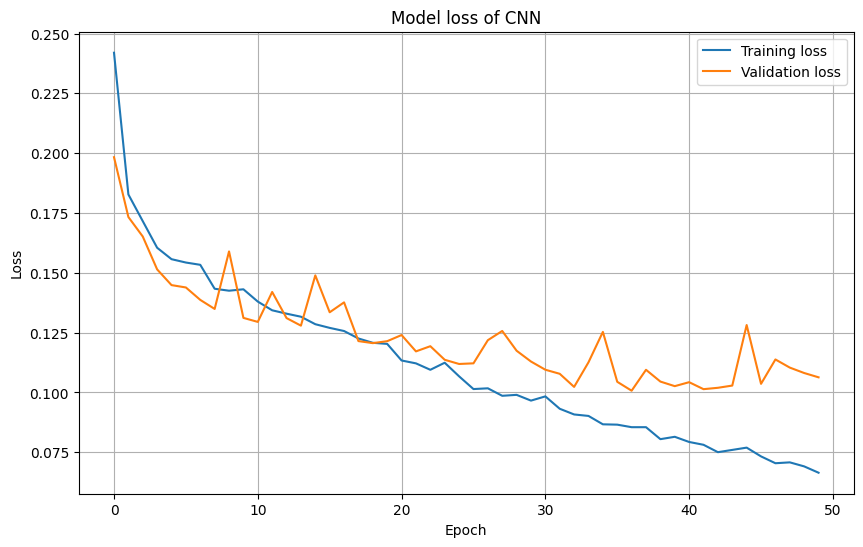

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss of CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [17]:
y_pred_binary = np.round(y_pred).flatten()
print('----------------')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_binary))
print('----------------')
print('Classification report')
print(classification_report(y_test, y_pred_binary))

----------------
Confusion matrix
[[4077  220]
 [ 107 4432]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4297
           1       0.95      0.98      0.96      4539

    accuracy                           0.96      8836
   macro avg       0.96      0.96      0.96      8836
weighted avg       0.96      0.96      0.96      8836



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - loss: 0.4637 - val_accuracy: 0.9004 - val_loss: 0.2399
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8928 - loss: 0.2583 - val_accuracy: 0.9092 - val_loss: 0.2232
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9018 - loss: 0.2373 - val_accuracy: 0.9134 - val_loss: 0.2149
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.2455 - val_accuracy: 0.9132 - val_loss: 0.2142
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9048 - loss: 0.2337 - val_accuracy: 0.9140 - val_loss: 0.2144
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9005 - loss: 0.2381 - val_accuracy: 0.9163 - val_loss: 0.2087
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9054 - loss: 0.2296 - val_accuracy: 0.9143 - val_loss: 0.2104
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9059 - loss: 0.2307 - val_accurac

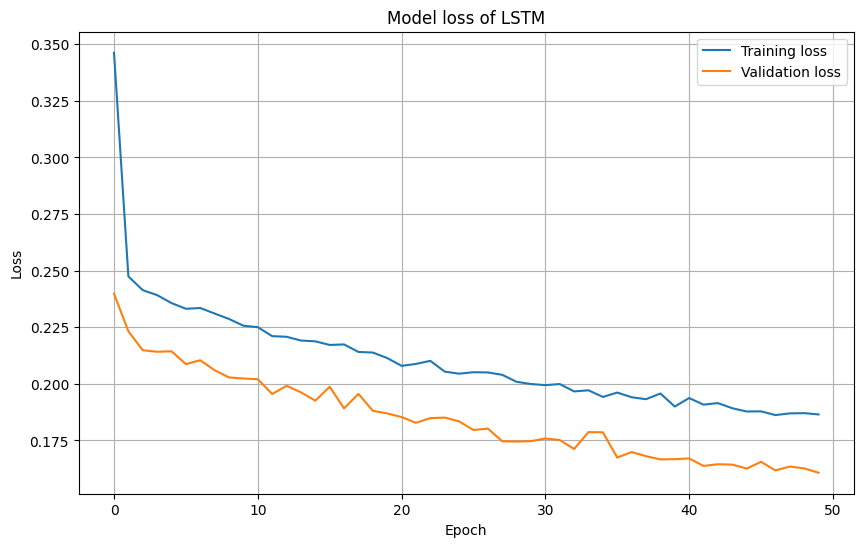

In [18]:
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
# Assuming each document vector has the same length
max_len = len(X_train[0])

# Reshape input data to 3D format (batch_size, timesteps, input_dim)
X_train_reshaped = np.reshape(X_train, (len(X_train), 1, max_len))
X_test_reshaped = np.reshape(X_test, (len(X_test), 1, max_len))

# Define the LSTM model
model0 = Sequential()
model0.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(1, activation='sigmoid'))

# Compile the model
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model0.summary())

# Train the model
history = model0.fit(X_train_reshaped, y_train, epochs=50, batch_size=128, validation_split=0.1)
loss, accuracy = model0.evaluate(X_test_reshaped, y_test)
y_pred = model0.predict(X_test_reshaped)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_probs = model0.predict(X_test_reshaped)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss of LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [19]:
import  numpy as np
y_pred_binary = np.round(y_pred).flatten()
print('----------------')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_binary))
print('----------------')
print('Classification report')
print(classification_report(y_test, y_pred_binary))

----------------
Confusion matrix
[[4088  209]
 [ 314 4225]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4297
           1       0.95      0.93      0.94      4539

    accuracy                           0.94      8836
   macro avg       0.94      0.94      0.94      8836
weighted avg       0.94      0.94      0.94      8836



  1/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step


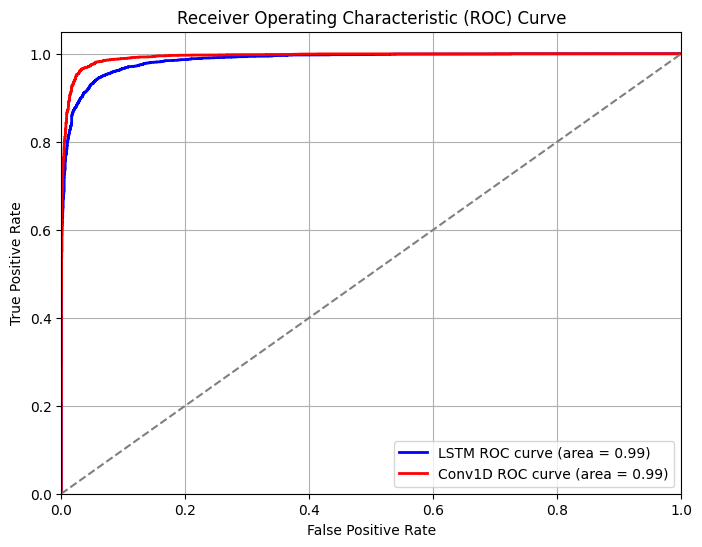

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class from both models
y_probs_lstm = model0.predict(X_test_reshaped)
y_probs_conv1d = model.predict(X_test)

# Compute ROC curve and AUC for LSTM model
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_probs_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Compute ROC curve and AUC for Conv1D model
fpr_conv1d, tpr_conv1d, _ = roc_curve(y_test, y_probs_conv1d)
roc_auc_conv1d = auc(fpr_conv1d, tpr_conv1d)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='blue', lw=2, label='LSTM ROC curve (area = %0.2f)' % roc_auc_lstm)
plt.plot(fpr_conv1d, tpr_conv1d, color='red', lw=2, label='Conv1D ROC curve (area = %0.2f)' % roc_auc_conv1d)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [28]:
df_2nd = pd.read_csv(data_path +"2nd/" +"train.csv")
# df_2nd.head()
# df_2nd.shape()
print(df_2nd.head())
print(df_2nd.shape)

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
(20800, 5)


In [ ]:
df_2nd = df_2nd.drop(['title','author','id'],axis=1)
df_2nd['text'] = df_2nd['text'].astype(str)
df_2nd['clean_text'] = df_2nd['text'].apply(preprocess_text)
df_2nd['doc_vector'] = df_2nd['clean_text'].apply(tokens_to_vectors)
df_2nd = df_2nd.dropna()
df_2nd.head()

,text,label,clean_text,doc_vector
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[house, dem, aide, didnt, even, see, comeys, l...","[-0.050807018, 0.04975615, 0.2658656, -0.32393..."
1,Ever get the feeling your life circles the rou...,0,"[ever, get, feeling, life, circles, roundabout...","[-0.0006217707, 0.215978, 0.294425, -0.0798217..."
2,"Why the Truth Might Get You Fired October 29, ...",1,"[truth, might, get, fired, october, tension, i...","[-0.041612357, 0.21105361, 0.30817404, -0.0764..."
3,Videos 15 Civilians Killed In Single US Airstr...,1,"[videos, civilians, killed, single, us, airstr...","[-0.1113405, 0.11081573, 0.092530034, -0.14825..."
4,Print \nAn Iranian woman has been sentenced to...,1,"[print, iranian, woman, sentenced, six, years,...","[0.19707523, 0.09317374, 0.060490813, -0.18551..."


In [ ]:
X_test = df_2nd['doc_vector'].to_list() 
y_test = df_2nd['label']


max_len = len(X_train[0])
# # Reshape input data to 3D format (batch_size, timesteps, input_dim)
X_test_reshaped = np.reshape(X_test, (len(X_test), 1, max_len))
loss, accuracy = model0.evaluate(X_test_reshaped, y_test)


print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


  1/646 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5000 - loss: 1.9075

646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.5826 - loss: 1.3210
Test Loss: 1.306755542755127
Test Accuracy: 0.5838578343391418


In [ ]:
y_pred_binary = np.round(y_pred).flatten()
print('----------------')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_binary))
print('----------------')
print('Classification report')
print(classification_report(y_test, y_pred_binary))

----------------
Confusion matrix
[[3339 7047]
 [1413 8855]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.70      0.32      0.44     10386
           1       0.56      0.86      0.68     10268

    accuracy                           0.59     20654
   macro avg       0.63      0.59      0.56     20654
weighted avg       0.63      0.59      0.56     20654



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_2nd['doc_vector'].to_list() , df_2nd['label'], test_size=0.2, random_state=42)

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

history2 = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50


117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.7811 - val_accuracy: 0.7919 - val_loss: 0.4346
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.4127 - val_accuracy: 0.8161 - val_loss: 0.3935
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.3905 - val_accuracy: 0.8324 - val_loss: 0.3747
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.3700 - val_accuracy: 0.8318 - val_loss: 0.3668
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.3614 - val_accuracy: 0.8355 - val_loss: 0.3776
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3558 - val_accuracy: 0.8463 - val_loss: 0.3506
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.3370 - val_accuracy: 0.8482 - val_loss: 0.3426
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3232 - val_accuracy: 0.8482 - val_

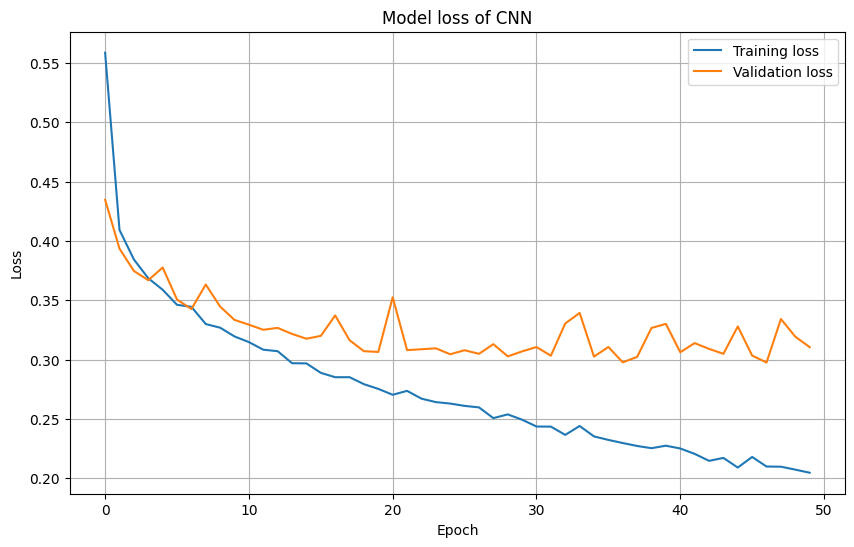

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.title('Model loss of CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
y_pred_binary = np.round(y_pred).flatten()
print('----------------')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_binary))
print('----------------')
print('Classification report')
print(classification_report(y_test, y_pred_binary))

----------------
Confusion matrix
[[1904  191]
 [ 336 1700]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2095
           1       0.90      0.83      0.87      2036

    accuracy                           0.87      4131
   macro avg       0.87      0.87      0.87      4131
weighted avg       0.87      0.87      0.87      4131



In [ ]:
def single_vectorize(input_text):
    inp_df = pd.DataFrame([input_text],columns=["text"])
    inp_df["text"]=inp_df["text"].apply(preprocess_text)
    inp_df["text"]=inp_df["text"].apply(tokens_to_vectors)
    return inp_df["text"].to_list()

test_text = """
House Dem Aide: We Didn? Even See Comey? Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week?BI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton? email server, the ranking Democrats on the relevant committees didn? hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, "The FBI has learned of the existence of emails that appear to be pertinent to the investigation." Case reopened 
??Jason Chaffetz (@jasoninthehouse) October 28, 2016 
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of ?n unrelated case?hich we now know to be Anthony Weiner? sexting with a teenager. But apparently such little things as facts didn? matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary wins?t least two years??worth, and possibly an entire term? worth of them. Apparently Chaffetz thought the FBI was already doing his work for him?esulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetz??sins. That aide told Shareblue that his boss and other Democrats didn? even know about Comey? letter at the time?nd only found out when they checked Twitter. ?emocratic Ranking Members on the relevant committees didn? receive Comey? letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didn??receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.??
So let? see if we?e got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. 
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. 
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didn? even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesn? trample on basic standards of fairness, I don? know what does. 
Granted, it? not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetz??planned fishing expedition. But that doesn? mean we can? turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus 
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect
"""


single_input = single_vectorize(test_text)  
single_input_reshaped = np.reshape(single_input, (1, 100))
single_input_reshaped = np.asarray(single_input_reshaped).astype(np.float32)
prediction = model.predict(single_input_reshaped)

print(prediction)

predicted_class = 1 if prediction > 0.5 else 0
print("Predicted Class:", predicted_class)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[0.74954563]]
Predicted Class: 1
